<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Musterlösung 9</h1>
    Ausgabe: 16. Dezember 2022 10:00 Uhr, Abgabe: 13. Januar 2023 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 2: Erweiterter Minimum-Likelihood Fit und Profiling (20P)</h3>
</font>

In dieser Übung wird ein Beispieldatensatz betrachtet, welcher aus zwei verschiedenen Arten von Ereignissen besteht: Signalereignisse ($s$), welche in einer Gaussverteilung $f_s(x)$ vorliegen, und Untergrundereignisse ($b$ für background), welche nach einer Exponentialfunktion $f_b(x)$ verteilt sind. Ziel ist es, die erweiterte Maximum Likelihood Methode zu benutzen, um die Anzahl von Signal- und Untergrundereignissen aus einem Beispieldatensatz zu bestimmen.

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as opt
import numpy as np

In [3]:
## von Übungsblatt 5:
def listOfBins(xmin, xmax, nbins):
    return [xmin+(xmax-xmin)/nbins*i for i in range(nbins+1)] ## +1 since we need the upper bound as well

Betrachten Sie die Wahrscheinlichkeitsdichtefunktion (WDF) $f(x; \mu_s, \mu_b)$ für die Signal- und Untergrundverteilung:

\begin{equation}
f(x; \mu_s, \mu_b) = \frac{\mu_s}{\mu_s + \mu_b} f_s(x) + \frac{\mu_b}{\mu_s + \mu_b} f_b(x)
\end{equation}

wobei entsprechend $\mu_s$ und $\mu_b$ für die Anzahl von Signal- und Untergrundereignissen stehen. Um das Beispiel zu vereinfachen, nehmen wir an, dass die Parameter der Signal- und Untergrund-WDF bekannt sind. Daher sind $f_s$ und $f_b$ Funktionen von nur einer Variablen $x$.

Üblicherweise in Experimenten der Teilchenphysik, ist die Gesamtzahl an Ereignissen poissonverteilt. Daher ergibt sich für die WDF:

\begin{equation}
P(n;\mu_s, \mu_b) = \frac{(\mu_s+\mu_b)^n}{n!} \exp(-(\mu_s+\mu_b)) 
\end{equation}

Daher ist die Log-Likelihoodfunktion gegeben durch

\begin{equation}
\ln \mathcal{L} = -(\mu_s+\mu_b) + \sum_{i=1}^n \ln [(\mu_s+\mu_b) ~ f(x_i; \mu_s, \mu_b)] 
\end{equation}

Diese Funktion muss nun maximiert werden um die Parameter der Signal- und Untergrundnormierung zu finden.

<font face="Times New Roman" size=4>
a) Erzeugung der Pseudo-Daten (4P)
</font>

Wie in Übungsblatt 8 müssen wir wieder zuerst unsere Daten "erzeugen" (in einem echten Experiment würden wir sie messen). Dafür erstellen wir zuerst unsere eigene WDF, anhand derer wir Zufallszahlen generieren werden. Die WDF hat die Form:
\begin{equation}
f(x; ~\mu, ~\sigma, ~\tau, ~f_s, ~f_b) = \frac{f_s}{f_s + f_b} \frac{1}{\sqrt{2\pi\sigma^2}} 
\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right) + \frac{f_b}{f_s + f_b} \frac{1}{\tau} \exp\left(-\frac{x}{\tau}\right) 
\end{equation}
und wir verwenden folgende Parameter:
* $f_s=0.5$ (Anteil der Signalereignisse)
* $f_b=0.5$ (Anteil der Untergrundereignisse, also $f_s/f_b = 1$, gleich viel Signal- wie Untergrundereignisse)
* $\mu=5.0$
* $\sigma=0.5$
* $\tau=10.0$

Mit Python kann man eine Zufallszahl anhand einer eigenen WDF erstellen indem man ein Child der Klasse `rv_continuous`, die im Modul `stats` der Bibliothek `scipy` definiert ist, erzeugt und die Methode `_pdf` überschreibt. Danach instanziert man die Child-Klasse, was die gewünschte Zufallszahl zurückgibt. Ein Beispiel für diese Methdode zur Erzeugung von gaussverteilten Zufallsvariablen ist im Folgenden gegeben.  In der Dokumentation der Funktion finden Sie genauere Informationen: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html .


In [31]:
# Beispiel um Zufallszahlen aus der Gaussverteilung mit mu = 1 und sigma = 2 zu ziehen:
class data_gen(st.rv_continuous):
    def _pdf(self, x):
        mu  = 1.0
        sig = 2.0
        return 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(x-mu)**2/(2*sig**2))
    
# a,b: Intervallgrenzen in denen die Zufallszahlen gezogen werden sollen, size gibt die Anzahl der Zufallszahlen an.
d = data_gen(a=-4, b=6, seed=1374)
data = d.rvs(size=1000)


Zeichnen Sie nun die gezogenen Zufallszahlen in ein Histogramm mit 30 Bins. Vergessen Sie nicht eine angemessene Achsenbeschriftung!

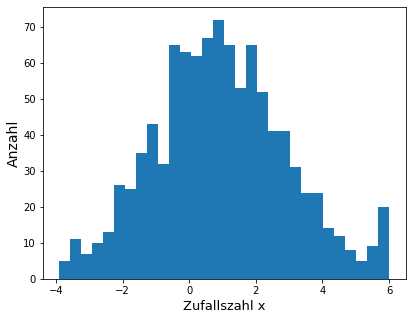

In [32]:
fig = plt.figure(figsize=(6.5, 5))
ax = fig.add_subplot()

plt.xlabel("Zufallszahl x", fontsize=13)
plt.ylabel("Anzahl", fontsize=14, labelpad=2)
ax.hist(data, bins=30)
plt.show()

Man sieht dass an den Intervallgrenzen Werte gehäuft vorkommen. Um das zu verhindern, kann man die Intervallgrenzen einfach auf "a= None, b=None" setzen (also auf += unendlich). Wiederholen sie die obigen Schritte mit diesen Einstellungen, und zeichnen Sie das Histogramm erneut. 

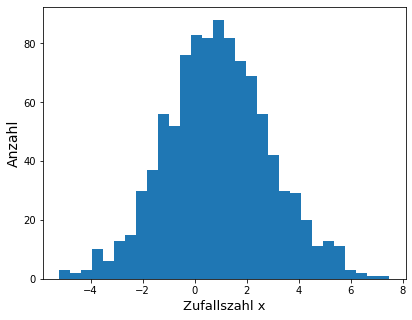

In [34]:
d = data_gen(a=None, b=None, seed=1374)
data = d.rvs(size=1000)

fig = plt.figure(figsize=(6.5, 5))
ax = fig.add_subplot()

plt.xlabel("Zufallszahl x", fontsize=13)
plt.ylabel("Anzahl", fontsize=14, labelpad=2)

ax.hist(data, bins=30)
plt.show()

Erstellen Sie also nun eine Child-Klasse `data_gen` von `rv_continuous` mit der obigen Funktion $f(x; \mu_s, \mu_b)$ als WDF und definieren Sie die Intervallgrenzen als $0\leq x \leq \infty$ (die Grenzen werden wie oben am Beispiel gezeigt als die beiden Parameter `a` und `b` bei der Instanzierung der Klasse übergeben). Mit der Funktion `rvs` erstellen Sie dann aus dem Datengenerator `data_gen` 1000 Zufallszahlen und speichern diese in die Liste `data`. Verwenden Sie den Seed 7435 um Ihre Ergebnisse reproduzierbar zu machen.

*Hinweis:* eine Klasse ist quasi der Bauplan für eine Variable von einem gewissen Typ (jeder Datentyp (int, float, ...) ist durch eine Klasse definiert), und so beinhaltet eine Klasse nicht nur die Parameter (genannt *Mitglieder*) des Objektes, sondern auch seine Funktionen (genannt *Methoden*). Man könnte sagen, eine Klasse ist eine Menge von zusammengehörigen Funktionen und Parametern. Und wenn man eine neue Variable mit dieser Klasse als "Datentyp" erzeugt, erstellt man eine Kopie der Klasse, sodass man für jede Variable alle Methoden und Parameter zur Verfügung hat.

In [46]:
class data_gen(st.rv_continuous):
    def _pdf(self, x):
        fs  = 0.5
        fb  = 0.5
        mu  = 5.0
        sig = 0.5
        tau = 10.0
        return fs/(fs+fb) * 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(x-mu)**2/(2*sig**2)) + fb/(fs+fb) * 1/tau * np.exp(-x/tau)
    

In [47]:
d = data_gen(a=0, b=None, seed=7435)
data = d.rvs(size=1000)

Zeichnen Sie nun ein Histogramm mit 90 Bins im Intervall $[0,30]$ um die Daten zu visualisieren.

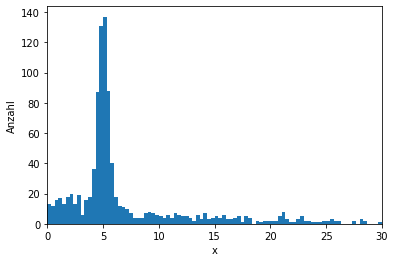

In [48]:
plt.hist(data, bins=listOfBins(0,30,90))
plt.xlabel("x")
plt.ylabel("Anzahl")
plt.xlim(0,30)
plt.show()

<font face="Times New Roman" size=4>
b) Log-Likelihood (4P)
</font>

Für die Berechnung der Likelihood müssen wir zunächst eine Funktion `wdf` erzeugen, die wieder die WDF aus Teil a) implementiert, also den Wert von $f$ für ein gegebenes $x$ zurückgibt. Allerdings müssen die Anteile der Signal- und Untergrundereignisse $f_s$ und $f_b$ durch die Anzahl der Signal- und Untergrundereignisse $\mu_s$ und $\mu_b$ ersetzt werden, wobei $\mu_s=\mu_b=500$ (da $500 = 0.5\cdot 1000$ Ereignisse) als Startwert verwendet wird. D.h. die Funktion `wdf` nimmt neben $x$ auch $\mu_s$ und $\mu_b$ als Parameter. Die anderen Parameter setzen Sie auf dieselben Werte wie vorher. Der Grund ist, dass sich $\mu_s$ und $\mu_b$ bei der Berechnung der Likelihood verändern, wobei die anderen Parameter gleich bleiben.

In [93]:
def wdf(x, mus=0.5*1000, mub=0.5*1000):
    fs  = mus
    fb  = mub
    mu  = 5.0
    sig = 0.5
    tau = 10.0
    return fs/(fs+fb) * 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(x-mu)**2/(2*sig**2)) + fb/(fs+fb)*1/tau*np.exp(-x/tau)


Schreiben Sie nun eine Funktion `nll`, die die negative Log-Likelihood (NLL) berechnet. Die Parameter dieser Funktion sind `mus` und `mub` für jeweils $\mu_s$ bzw. $\mu_b$, und die Daten `data` aus Teil a). 

In [50]:
def nll(data, mus, mub):
    result =  -(mus+mub)
    for x in data:
        result = result + np.log((mus + mub) * wdf(x, mus, mub))
    return -result

Berechnen Sie die negative Log-Likelihood für ein paar Werte von $\mu_s$ und $\mu_b$.

In [51]:
nll(data, 500, 500)

-3354.099264796251

In [52]:
nll(data, 530, 490)

-3352.0908687842984

In [53]:
nll(data, 510, 450)

-3349.832459769886

<font face="Times New Roman" size=4>
c) Grafische Darstellung (3P)
</font>

Wir müssen das Minimum der NLL in Abhängigkeit der Parameter $\mu_s$ und $\mu_b$ finden. Dabei bietet es sich an, zuerst mal die Werte der Likelihood in einem 2D Diagramm darzustellen. Berechnen Sie also die Werte der NLL für $450\leq \mu_{s,b} \leq 550$ in Schritten von 2 und tragen Sie diese in ein 2D Histogramm mit 50 Bins je Achse ein (c.f. Übungsblatt 3 Aufgabe 4). Die Werte der NLL je Bin können sie als Gewicht via dem Parameter `weights` an die Histogramm Funktion übergeben um die Likelihood so als Farbwert (verwenden Sie die Farbpalette `jet` wie in Übungsblatt 3) darzustellen. Sie sollten in der Lage sein, das Minimum visuell klar identifizieren zu können.

In [54]:
coord2d = []
data2d  = []
for mus in range(450, 550 ,2):
    for mub in range(450, 550, 2):
        coord2d.append((mus, mub))
        data2d .append(nll(data, mus, mub))

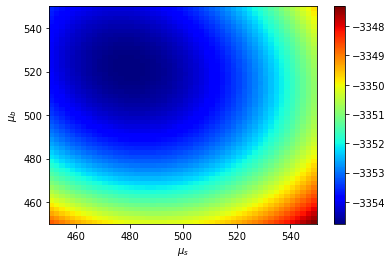

In [55]:
bins = listOfBins(450, 550, 50)
plt.hist2d([x[0] for x in coord2d], [x[1] for x in coord2d], weights=data2d, bins=(bins, bins), cmap="jet")
plt.xlabel("$\mu_s$")
plt.ylabel("$\mu_b$")
plt.colorbar()
plt.xlim(450, 550)
plt.ylim(450, 550)
plt.show()

<font face="Times New Roman" size=4>
d) Bestimmung des Minimums (4P)
</font>

Bestimmen Sie nun jene Konfiguration von $\mu_s$ und $\mu_b$, die die NLL minimiert, indem Sie wieder mit dem Modul `scipy.optimize` einen Fit durchführen so wie in Übungsblatt 8. Die Musterloesung für Blatt 8 wurde in Ilias hochgeladen. 

In [97]:
def negLogLik(args, func,  data):
    #print(-np.sum(np.log(func(data, *args))),"  ",args[0],"  ",args[1])
    return -np.sum(np.log((args[0]+args[1])*func(data, *args))) + args[0] + args[1]

In [98]:
result = opt.minimize(negLogLik,          # die zu minimierende Funktion
                      args = (wdf, data), # Funktion und Daten
                      x0   = (500, 500) , # Startwert für mus, mub
                     )

In [99]:
result

      fun: -3354.7530121630944
 hess_inv: array([[ 335.37009666, -334.71916666],
       [-334.71916666,  336.06764209]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 5
     njev: 15
   status: 0
  success: True
        x: array([479.05822442, 520.93877537])

In [100]:
result.x

array([479.05822442, 520.93877537])

<font face="Times New Roman" size=4>
e) Bestimmung der Unsicherheiten mittels der Profil-Likelihood (5P)
</font>

Um die Unsicherheiten zu bestimmen, können wir zum Beispiel wie in der Vorlesung 13 gezeigt, die Profil-Likelihood verwenden. Zur Bestimmung der Unsicherheit von $\mu_s$ behandeln wir also $\mu_b$ als Störparameter. Wir spielen das zunächst für einen einzelnen Wert $\mu_s$ durch. Nehmen wir an, dass $\mu_s = 450$. Setzen wir den Wert in die oben definierte WDF ein, so hängt diese nur noch vom Parameter $\mu_b$ ab. Wir können jetzt die negative LLH für diese WDF minimieren, um $\hat{\hat{\mu}}_b$ zu bestimmen. 

Führen Sie diesen Schritt jetzt durch, und lassen Sie sich den negativen LLH-Wert fuer diese Minimierung mit `result.fun` ausgeben.

Hinweis: Setzen Sie einfach die Grenzen fuer $\mu_s$ einfach auf einen festen Wert in der `minimize` Funktion. Das geht mittels der Einstellung: `bounds = ((450, 450), (None, None))`.

In [112]:
result = opt.minimize(negLogLik,          # die zu minimierende Funktion
                      args = (wdf, data), # Funktion und Daten
                      x0   = (450, 500) , # Startwert für mus, mub
                      bounds = ((450, 450), (None, None))
                     )

In [113]:
print(result.fun)

-3353.9798480201944


Führen Sie diese Methode jetzt für 10'000 Werte von $\mu_s$ zwischen 450 und 550 durch, und speichern Sie die LLH-Werte welche die `minimize` Funktion Ihnen zurückgibt in einem array namens `nLLH_Profil` ab. 

In [114]:
values_mus = np.linspace(450, 550, 100)

nLLH_Profil = []

for mu in values_mus:
    result = opt.minimize(negLogLik,          # die zu minimierende Funktion
                      args = (wdf, data), # Funktion und Daten
                      x0   = (mu, 500) , # Startwert für mus, mub
                      bounds = ((mu, mu), (None, None))
                     )
    nLLH_Profil.append(result.fun)

Verwandeln Sie nun das array in ein `numpy` array, und bestimmen Sie das Minimum mittels der `min` Funktion und speichern Sie diesen Wert in der Variablen `Minimum`.

In [115]:
new_array = np.array(nLLH_Profil)
Minimum = min(new_array)


Verschieben Sie nun alle Werte in `nLLH_Profil` um den Wert `Minimum`, so dass Sie ein Array für $\Delta ln L$ erhalten. 

In [116]:
delta_lnL = new_array-Minimum

Plotten Sie nun $\Delta \ln L$ als Funktion von $\mu_s$. Zoomen Sie mit `xlim` und `ylim` näher an das Minimum heran. Zeichnen Sie eine horizontale Linie mit `axhline` bei $\Delta \ln L$ = 0.5 ein. Der Schnittpunkt dieser horizontalen Linie mit der Parabel gibt Ihnen die statistische Unsicherheit auf $\hat{\mu}_s$.

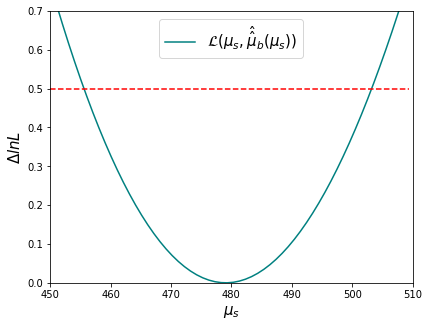

In [117]:
fig = plt.figure(figsize=(6.5, 5))
ax = fig.add_subplot()

ax.plot(values_mus, delta_lnL, label='$\mathcal{L}(\mu_s, \hat{\hat{\mu}}_b(\mu_s))$', color='teal')
plt.axhline(y=0.5, xmin=0.0, xmax=0.99, c='red', ls='--')
ax.legend(fontsize=15)
ax.set_xlim([450.0, 510.0])
ax.set_ylim([0.0, 0.7])
plt.xlabel("$\\mu_s$", fontsize=15)
plt.ylabel("$\Delta ln L$", fontsize=15)
plt.savefig("VL12_SummeGauss_Pseudodaten_LLH_condit_nu1.png")
plt.show()